### Normalization Functions

In [41]:
def scaleEigenvalues(eigenvalues, sage=False):
    all_eigenvals_weighted = list()
    lambda_1 = min(eigenvalues)
    lambda_n = max(eigenvalues)
    for val in eigenvalues:
        e_weighted = (val-lambda_1)/(lambda_n-lambda_1)
        if sage:
            all_eigenvals_weighted.append(RR(e_weighted))
        else:
            all_eigenvals_weighted.append(e_weighted)
    return all_eigenvals_weighted

def dictScaleEigenvalues(eigenvalues):
    all_eigenvalues_weighted = dict()
    i = 3
    for m in eigenvalues.values():
        lambda_1 = min(m)
        lambda_n = max(m)
        vals = list()
        for e in m:
            e_weighted = (e-lambda_1)/(lambda_n-lambda_1)
            # Omit the non-real portion of any complex number
            # RealField() Floating number with arbitrary (still fixed) many bits of precision
            vals.append(RR(e_weighted))
        all_eigenvalues_weighted[i] = vals
        i += 1
    return all_eigenvalues_weighted


# Cyclic Permutations of n-gons

Observations:
* Repeating eigenvalues except for 2 and -2 (at 48 permutation group)
* Larger gaps in the center, gaps get smaller towards edges

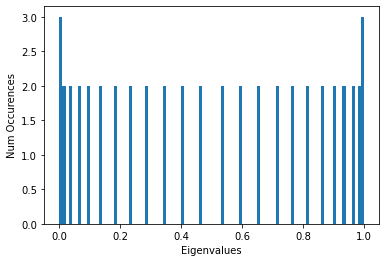

In [42]:
import matplotlib.pyplot as plt

export_data = dict()
all_eigenvals = list()

for i in range(3,51):
    C = groups.permutation.Cyclic(i)
    # Make generating set
    s1 = tuple(range(1,i+1))
    s_ = [1] + list(range(i, 1, -1))
    s2 = tuple(s_)
    S = [s1,s2]
    # Produce Cayley Graph
    d = C.cayley_graph(generators=S)
    d = d.to_undirected()
    # Adjacency matrix fxn
    A = d.adjacency_matrix()
    # Get Eigenvalues
    eigenvals = A.eigenvalues()
    for e in eigenvals:
        all_eigenvals.append(e)
    export_data[i] = eigenvals


# Scale eigenvalues within dictionary
weighted_dict = dictScaleEigenvalues(export_data)

# Scale eigenvalues within list
all_eigenvals_weighted = scaleEigenvalues(all_eigenvals, sage=True)


# Make histogram for all eigenvalues from cyclic permutations from cyclic groups 3 to 50   
# Make histogram for n = 50
plt.hist(list(weighted_dict[50]), density=False, bins=100) 
plt.ylabel('Num Occurences')
plt.xlabel('Eigenvalues');
plt.show()


# Cyclic Permutations n-gons with Opposite Edges

* If we use a cyclic group with n = 2k elements (even number of elements)...
* We can choose S = {1, k, 2k - 1} as our generating set.
* The Cayley graph will produce the regular n-gon (from generators 1 and 2k - 1) and the diagonals of the regular n-gon (from the generator k).
* Experiment using the cyclic group with n elements and choose different generating sets S. (One condition on S: if k is in S, so is n - k.)


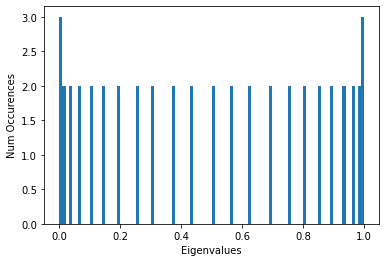

In [88]:
import matplotlib.pyplot as plt

for i in range(3,49):
    C = groups.permutation.Cyclic(i)
    # Make generating set
    s1 = tuple(range(1,i+1))
    s_ = [1] + list(range(i, 1, -1))
    s2 = tuple(s_)
    s3 = []
    #only if i is even
    # Need to figure out how to multiply the permutations for s3
    # recognize as perms and multiply together
    #for j in range(1, (i/2)+1):
        #s3.append((j, j+(i/2)))
    S = [s1,s2]
    #print(S)
   
    # Produce Cayley Graph
    d = C.cayley_graph(generators=S)
    d = d.to_undirected()
    
    # Adjacency matrix fxn
    A = d.adjacency_matrix()

    # Get Eigenvalues
    eigenvals = A.eigenvalues()
    export_data[i] = eigenvals
    
# Scale eigenvalues within dictionary
weighted_dict = dictScaleEigenvalues(export_data)

# Make histogram for n = 100
plt.hist(list(weighted_dict[48]), density=False, bins=100)  # density=False would make counts
plt.ylabel('Num Occurences')
plt.xlabel('Eigenvalues');
plt.show()


# Random Adjacency Matrices with Zero Diagonal
### Looks like adjacency matrix (vertex never has edge with itself)
* Binomial dist. and pick either 0 or 1 (50-50 prob to start, then can look at other examples - sparse/dense graphs). Populate diagonal with zeros. Symmetric.
* Do these distributions look similar to the distributions yielded from the special Cayley graphs?

Observations:
* As the success rate decreases, the spread of the eigenvalues increases. Eigenvalues between 0 and .4 with .5 success, always 1 eigenvalue at 1. Why?

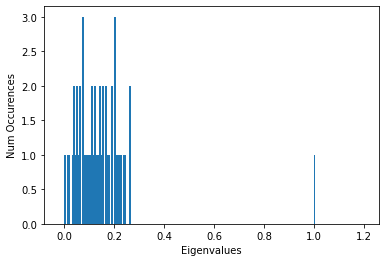

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# num trials, success rate, size
s = np.random.binomial(1, .75, size=(50,50))
rows = s.shape[0]
cols = s.shape[1]
for i in range(0, rows):
    for j in range(i+1, cols):
        s[j,i] = s[i,j]
np.fill_diagonal(s, 0)

# Get eigenvalues
eigenvals = np.linalg.eigvalsh(s) 

# Scale eigenvalues
all_eigenvals_weighted = scaleEigenvalues(eigenvals)
    
 # Make histogram
plt.hist(all_eigenvals_weighted, density=False, bins=200, range=[float(-0.02),float(1.2)])  # density=False would make counts
plt.ylabel('Num Occurences')
plt.xlabel('Eigenvalues');
plt.show()


# 200 Real 50x50 Symmetric Matrices
## Normal Distribution

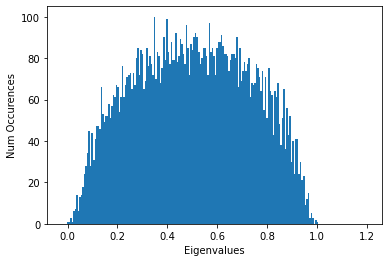

In [56]:
import numpy as np
import matplotlib.pyplot as plt

all_eigenvals = list()
for i in range(200):
    s = np.random.normal(0, 1, size=(50,50))

    rows = s.shape[0]
    cols = s.shape[1]
    for i in range(0, rows):
        for j in range(i+1, cols):
            s[j,i] = s[i,j]

    # Get eigenvalues
    eigenvals = np.linalg.eigvalsh(s)
    for e in eigenvals:
        all_eigenvals.append(e)
    
# Scale eigenvalues
all_eigenvals_weighted = scaleEigenvalues(all_eigenvals)
    
# Make histogram
plt.hist(all_eigenvals_weighted, density=False, bins=200, range=[float(-0.02),float(1.2)])  # density=False would make counts
plt.ylabel('Num Occurences')
plt.xlabel('Eigenvalues');
plt.show()


# 200 Real 50x50 Symmetric Matrices
## Uniform Distribution
Observations: 
* Looks a lot like the random adjacency matrices (with binomial dist.)

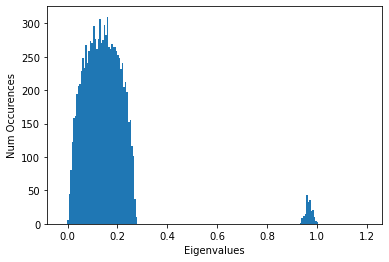

In [47]:
import numpy as np
import matplotlib.pyplot as plt

all_eigenvals = list()
for i in range(200):
    s = np.random.uniform(0, 1, size=(50,50))
    rows = s.shape[0]
    cols = s.shape[1]
    for i in range(0, rows):
        for j in range(i+1, cols):
            s[j,i] = s[i,j]
    # Get eigenvalues
    eigenvals = np.linalg.eigvalsh(s)
    for e in eigenvals:
        all_eigenvals.append(e)

# Scale eigenvalues
all_eigenvals_weighted = scaleEigenvalues(all_eigenvals)
    
# Make histogram
plt.hist(all_eigenvals_weighted, density=False, bins=200, range=[float(-0.02),float(1.2)])  # density=False would make counts
plt.ylabel('Num Occurences')
plt.xlabel('Eigenvalues');
plt.show()

# Uniform Distribution

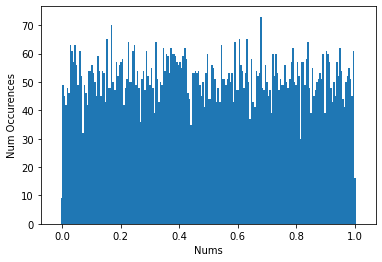

In [58]:
import numpy as np
import matplotlib.pyplot as plt

nums = []
# Generate uniform numbers
for i in range(10000):
    num = np.random.uniform(0, 1)
    nums.append(num)
    
# Scale Eigenvalues    
weighted_nums = scaleEigenvalues(nums) 
    
# Make histogram
plt.hist(weighted_nums, density=False, bins=200, range=[float(-.02),float(1.02)])  # density=False would make counts
plt.ylabel('Num Occurences')
plt.xlabel('Nums');
plt.show()

# Poisson Spectrum

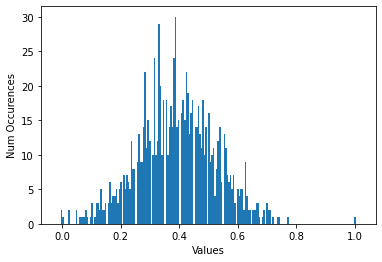

In [59]:
import numpy as np
import random
import matplotlib.pyplot as plt

nums = []
# Generate Poission numbers
for i in range(1000):
    # params: lambda, size
    num = np.random.poisson(500)
    nums.append(num)
    
weighted_nums = scaleEigenvalues(nums)

# Make histogram
plt.hist(weighted_nums, density=False, bins=200, range=[float(-.02),float(1.02)])  # density=False would make counts
plt.ylabel('Num Occurences')
plt.xlabel('Values');
plt.show()

### If Needed: Code to push to excel spreadsheet

In [3]:
#import xlwt
#from xlwt import Workbook
"""
# Push data to excel spreadsheet
wb = Workbook()
sheet1 = wb.add_sheet('Cyclic Perms Eigenvalues')
# Column Headers
sheet1.write(int(0), 0, "n")
sheet1.write(int(0),1, "Eigenvalues")
# Perm number
rows = list(export_data.keys())
i = 1
for val in rows:
    sheet1.write(int(i), 0, val)
    i += 1
# Eigenvalues
r = 1
for vals in export_data.values():
    c = 1
    for val in vals:
        sheet1.write(int(r), int(c), str(val))
        c += 1
    r += 1    
wb.save('xlwt cyclic_perms_eigenvals.xls')
"""

"""
# Push data to excel spreadsheet
sheet2 = wb.add_sheet('Cyclic Perms Eigenvalues Scaled')
# Column Headers
sheet2.write(int(0), 0, "n")
sheet2.write(int(0),1, "Eigenvalues")
# Perm number
rows = list(weighted_export.keys())
i = 1
for val in rows:
    sheet2.write(int(i), int(0), str(val))
    i += 1
# Eigenvalues
r = 1
for vals in weighted_export.values():
    c = 1
    for val in vals:
        sheet2.write(int(r), int(c), str(val))
        c += 1
    r += 1    
wb.save('xlwt cyclic_perms_eigenvals_weighted.xls')
"""

'\n# Push data to excel spreadsheet\nsheet2 = wb.add_sheet(\'Cyclic Perms Eigenvalues Scaled\')\n# Column Headers\nsheet2.write(int(0), 0, "n")\nsheet2.write(int(0),1, "Eigenvalues")\n# Perm number\nrows = list(weighted_export.keys())\ni = 1\nfor val in rows:\n    sheet2.write(int(i), int(0), str(val))\n    i += 1\n# Eigenvalues\nr = 1\nfor vals in weighted_export.values():\n    c = 1\n    for val in vals:\n        sheet2.write(int(r), int(c), str(val))\n        c += 1\n    r += 1    \nwb.save(\'xlwt cyclic_perms_eigenvals_weighted.xls\')\n'